In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



# Numerical integration

In this assignment, we are going to implement several of the most-common numerical integration methods,
and evaluate and compare their performance


Butcher Tableau

## Explicit fixed-step integrators

In [80]:

class BaseFixedStepIntegrator:
    """
    A base class for fixed-step integration methods.
    """
    def __init__(self, dt=1e-3):
        self.dt = dt
        self.name = self.__class__.__name__
        

class Euler(BaseFixedStepIntegrator):
    """
    Note:
    super() calls the constructor of BaseIntegrator
    kwargs get passed on to the constructor of BaseIntegrator
    """
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
    def integrate(self, f, t0, y0, t1):
        """
        Integrate the ODE y' = f(t, y) from t0 to t1 using Euler's method.
        """
        t = np.arange(t0, t1, self.dt)
        n = len(t)
        y = np.zeros((n + 1, y0.shape[-1]))
        y[0] = y0
        print(y[0])
        for i in range(n):
            y[i + 1] = y[i] + self.dt * f(t[i], y[i])
        return t, y

class RungeKutta(BaseFixedStepIntegrator):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def integrate(self, f, t0, y0, t1):
        t = np.arange(t0, t1, self.dt)
        n = len(t)
        y = np.zeros((n + 1, y0.shape[-1]))
        y[0] = y0
        for i in range(n):
            k1 = f(t[i], y[i])
            k2 = f(t[i] + 0.5 *  self.dt, y[i] + 0.5 *  self.dt * k1)
            k3 = f(t[i] + 0.5 *  self.dt, y[i] + 0.5 *  self.dt * k2)
            k4 = f(t[i] + self.dt, y[i] + self.dt * k3)
            y[i + 1] = y[i] + self.dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        return t, y


class DormandPrince(BaseFixedStepIntegrator):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def integrate(self, f, t0, y0, t1):
        t = np.arange(t0, t1, self.dt)
        h = self.dt
        n = len(t)
        y = np.zeros((n + 1, y0.shape[-1]))
        y[0] = y0
        for i in range(n):
            k1 = f(t[i], y[i])
            k2 = f(t[i] + 0.25 * h, y[i] + 0.25 * h * k1)
            k3 = f(t[i] + (3 / 8) * h, y[i] + (3 / 32) * h * k1 + (9 / 32) * h * k2)
            k4 = f(t[i] + (12 / 13) * h, y[i] + (1932 / 2197) * h * k1 - (7200 / 2197) * h * k2 + (7296 / 2197) * h * k3)
            k5 = f(t[i] + h, y[i] + (439 / 216) * h * k1 - 8 * h * k2 + (3680 / 513) * h * k3 - (845 / 4104) * h * k4)
            k6 = f(t[i] + (1 / 35) * h, y[i] - (8 / 27) * h * k1 + 2 * h * k2 - 3544 / 2565 * h * k3 + 1859 / 4104 * h * k4 - 11 / 40 * h * k5)
            y[i + 1] = y[i] + (25 / 216) * h * k1 + 1408 / 2565 * h * k3 + 2197 / 4104 * h * k4 - 1 / 5 * h * k5
        return t, y


[-5. -4. 25.]


Text(0.5, 1.0, 'Built-in RK45 implementation')

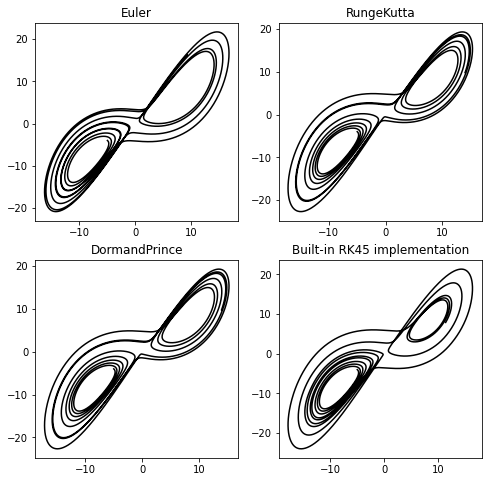

In [93]:
def lorenz(t, X, sigma=10, rho=28, beta=8/3):
    """
    The Lorenz equations in the chaotic regime.
    """
    x, y ,z = X
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])


# Define our global parameters
IC_VAL = np.array([-5, -4, 25])
DT_VAL = 1e-3
T_MIN = 0
T_MAX = 10




fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axs = np.ravel(axs)
for i, integrator in enumerate([Euler(), RungeKutta(), DormandPrince()]):
    
    # Can initialize an object from a string name and passes kwargs
    integrator.dt = DT_VAL
    tpts, sol = integrator.integrate(lorenz, T_MIN, IC_VAL, T_MAX)
    axs[i].plot(sol[:, 0], sol[:, 1], 'k')
    axs[i].set_title(integrator.name)


# # Compare our results to a built-in solver
from scipy.integrate import solve_ivp
sol = solve_ivp(lorenz, [0, 10], IC_VAL, method='RK45', t_eval=np.arange(T_MIN, T_MAX, DT_VAL))
sol = sol.y.T
axs[-1].plot(sol[:, 0], sol[:, 1], 'k')
axs[-1].set_title('Built-in RK45 implementation')


# Variable step integrators

# Implicit integrators

# Run Tests to see that everything is working

In [24]:
import sys, os, unittest
from datetime import datetime

class TestPowerMethod(unittest.TestCase):

    def test_initialization(self):
        method = PowerMethod(max_iter=13)
        assert method.max_iter == 13

    def test_fitting(self):
        assert True

    def test_eigspec(self):
        np.random.random((5,5))


print(print(os.getcwd()))
print(datetime.now().strftime("%H:%M:%S"))

unittest.main(argv=[''], exit=False)



...

/Users/williamgilpin/Documents/courses/phys381c_fall2022/hw1
None
21:32:53



----------------------------------------------------------------------
Ran 3 tests in 0.001s

OK


# Numerical integration, quadrature, and boundary value problems

# Symplectic integrators, Cash-Karp, and implicit

https://stackoverflow.com/questions/55844554/how-to-implement-adaptive-step-size-runge-kutta-cash-karp



In [ ]:
## We are going to do something super challenging: we are going to implement a random forest
## from scratch. 